<a href="https://colab.research.google.com/github/jweir136/Easy_Wine_1/blob/master/Easy_Red_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

%matplotlib inline

In [0]:
df = pd.read_csv("winequality-red (2).csv", sep=';')

df = shuffle(df)

train_df = df[:round(len(df) * .75)]
test_df = df[round(len(df) * .75):]

combine = [train_df, test_df]

In [87]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1026,7.9,0.31,0.32,1.9,0.066,14.0,36.0,0.99364,3.41,0.56,12.6,6
1203,9.9,0.74,0.19,5.8,0.111,33.0,76.0,0.99878,3.14,0.55,9.4,5
255,8.0,0.57,0.23,3.2,0.073,17.0,119.0,0.99675,3.26,0.57,9.3,5
576,9.9,0.50,0.24,2.3,0.103,6.0,14.0,0.99780,3.34,0.52,10.0,4
919,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6


In [88]:
train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.322936,0.522435,0.274737,2.539950,0.087257,15.823186,46.496247,0.996757,3.310467,0.661410,10.404629,5.639700
std,1.757521,0.176017,0.195327,1.433535,0.046158,10.344767,32.884089,0.001913,0.155479,0.170824,1.055740,0.821432
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.510000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996800,3.310000,0.620000,10.100000,6.000000
75%,9.300000,0.630000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997845,3.400000,0.740000,11.050000,6.000000
max,15.600000,1.330000,0.790000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [0]:
num_columns = train_df.select_dtypes(include=['number']).columns

In [90]:
num_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [91]:
train_df['quality'].unique()

array([6, 5, 4, 7, 8, 3])

In [92]:
test_df['quality'].unique()

array([5, 6, 7, 3, 4, 8])

In [93]:
for datalist in combine:
  datalist['quality'] = (datalist['quality'] <= 5).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


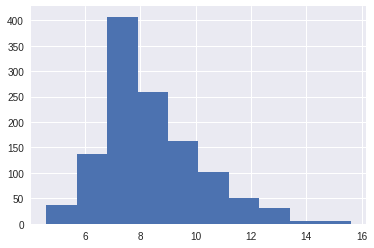

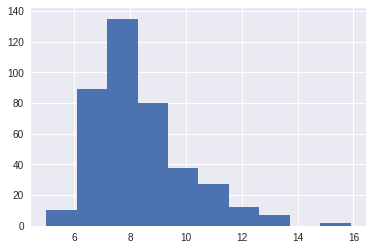

In [94]:
for datalist in combine:
  plt.figure()
  datalist['fixed acidity'].hist()

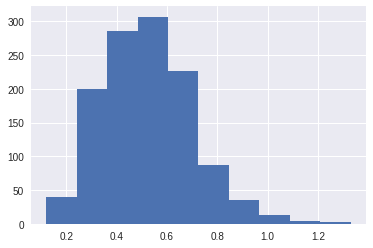

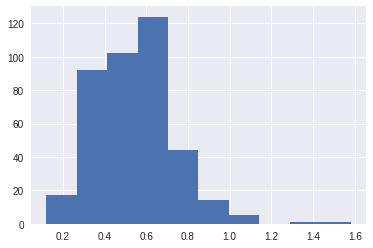

In [95]:
for datalist in combine:
  plt.figure()
  datalist['volatile acidity'].hist()

In [96]:
for datalist in combine:
  datalist['volatile acidity'] = np.log(datalist['volatile acidity'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
for datalist in combine:
  datalist['citric acid'] = np.log(datalist['citric acid'] + 1)
  datalist['citric acid'] = datalist['citric acid'] - np.log(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
for datalist in combine:
  datalist['residual sugar'] = np.log(datalist['residual sugar'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [99]:
for datalist in combine:
  datalist['chlorides'] = np.log(datalist['chlorides'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
for datalist in combine:
  datalist['free sulfur dioxide'] = np.log(datalist['free sulfur dioxide'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
for datalist in combine:
  datalist['density'] = np.log(datalist['density'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [102]:
for datalist in combine:
  datalist['alcohol'] = np.log(datalist['alcohol'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [104]:
train_df['quality'].value_counts()

0    635
1    564
Name: quality, dtype: int64

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
X = train_df.drop(['quality'], axis=1).values
y = train_df['quality'].values

In [0]:
log = Pipeline([
    ("scaler", StandardScaler()),
    ("log", LogisticRegression(C=100, tol=0.0001))
])

In [0]:
log_score = cross_val_score(log, X, y, cv=5)

In [109]:
log_score.mean()

0.737231520223152

In [0]:
params = {
    "log__C":[0.01, 0.1, 1, 10, 100, 1000],
    "log__tol":[1e-2, 1e-3, 1e-4, 1e-5]
}

grid = GridSearchCV(log, params, cv=5)

In [0]:
grid.fit(X, y)

In [112]:
grid.best_params_

{'log__C': 1, 'log__tol': 0.01}

In [113]:
grid.best_score_

0.737281067556297

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [0]:
from sklearn.model_selection import learning_curve

In [0]:
plot_learning_curve(log, "title", X, y)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(n_estimators=1500))
])

In [0]:
from sklearn.svm import SVC

In [0]:
svc = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

In [0]:
svc_score = cross_val_score(svc, X, y, cv=5)

In [129]:
svc_score.mean()

0.7605962343096234

In [0]:
params = {
    "svc__C":[0.01, 0.1, 1, 10],
    "svc__tol":[1e-3, 1e-4, 1e-5]
}

grid = GridSearchCV(svc, params, cv=5)

In [0]:
grid.fit(X, y)

In [135]:
grid.best_params_

{'svc__C': 1, 'svc__tol': 0.001}

In [136]:
grid.best_score_

0.7606338615512928

In [0]:
testX = test_df.drop(['quality'], axis=1).values
testY = test_df['quality'].values